In [3]:
import numpy as np
import pandas as pd
import csv
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination

In [5]:
#Read the attributes
lines = list(csv.reader(open('data7_names.csv', 'r')))
attributes = lines[0]
print(lines)

[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartdisease']]


In [6]:
heartDisease = pd.read_csv('data7_heart.csv', names = attributes)
heartDisease = heartDisease.replace('?', np.nan)

print('Few examples from the dataset are given below')
print(heartDisease.head())

Few examples from the dataset are given below
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

  ca thal  heartdisease  
0  0    6             0  
1  3    3             2  
2  2    7             1  
3  0    3             0  
4  0    3             0  


In [7]:
# Model Baysian Network
model = BayesianModel([('age', 'trestbps'), ('age', 'fbs'), ('sex', 'trestbps'),('exang', 'trestbps'),('trestbps','heartdisease'),('fbs','heartdisease'),
('heartdisease','restecg'),('heartdisease','thal'),('heartdisease','chol')])


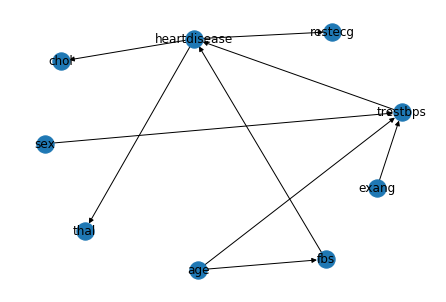

In [8]:
import networkx as nx
import pylab as plt
nx.draw(model, with_labels=True)
plt.show()

In [9]:
model.local_independencies('trestbps')
model.local_independencies('age')
model.get_independencies()

(age _|_ sex, exang)
(age _|_ exang | sex)
(age _|_ sex, exang | fbs)
(age _|_ sex | exang)
(age _|_ restecg, thal, chol | heartdisease)
(age _|_ exang | sex, fbs)
(age _|_ restecg, thal, chol | sex, heartdisease)
(age _|_ heartdisease, restecg, thal, chol | trestbps, fbs)
(age _|_ sex | fbs, exang)
(age _|_ restecg, thal, chol | fbs, heartdisease)
(age _|_ thal, chol | restecg, heartdisease)
(age _|_ restecg, thal, chol | trestbps, heartdisease)
(age _|_ restecg, thal, chol | exang, heartdisease)
(age _|_ restecg, thal | heartdisease, chol)
(age _|_ restecg, chol | thal, heartdisease)
(age _|_ heartdisease, restecg, thal, chol | sex, trestbps, fbs)
(age _|_ restecg, thal, chol | sex, fbs, heartdisease)
(age _|_ thal, chol | sex, restecg, heartdisease)
(age _|_ restecg, thal, chol | sex, trestbps, heartdisease)
(age _|_ restecg, thal, chol | sex, exang, heartdisease)
(age _|_ restecg, thal | sex, heartdisease, chol)
(age _|_ restecg, chol | sex, thal, heartdisease)
(age _|_ heartdiseas

In [10]:
# Learning CPDs using Maximum Likelihood Estimators
print('\nLearning CPDs using Maximum Likelihood Estimators...');
print(model.fit(heartDisease))


Learning CPDs using Maximum Likelihood Estimators...
None


In [11]:
print(model.get_cpds('age'))
print(model.get_cpds('thal'))
print(model.get_cpds('chol'))

+---------+------------+
| age(29) | 0.003367   |
+---------+------------+
| age(34) | 0.00673401 |
+---------+------------+
| age(35) | 0.013468   |
+---------+------------+
| age(37) | 0.00673401 |
+---------+------------+
| age(38) | 0.003367   |
+---------+------------+
| age(39) | 0.013468   |
+---------+------------+
| age(40) | 0.010101   |
+---------+------------+
| age(41) | 0.03367    |
+---------+------------+
| age(42) | 0.026936   |
+---------+------------+
| age(43) | 0.023569   |
+---------+------------+
| age(44) | 0.037037   |
+---------+------------+
| age(45) | 0.026936   |
+---------+------------+
| age(46) | 0.023569   |
+---------+------------+
| age(47) | 0.016835   |
+---------+------------+
| age(48) | 0.023569   |
+---------+------------+
| age(49) | 0.016835   |
+---------+------------+
| age(50) | 0.023569   |
+---------+------------+
| age(51) | 0.040404   |
+---------+------------+
| age(52) | 0.037037   |
+---------+------------+
| age(53) | 0.023569   |


In [12]:
# Inferencing with Bayesian Network
print('\nInferencing with Bayesian Network:')
HeartDisease_infer = VariableElimination(model)



Inferencing with Bayesian Network:


In [13]:
# Computing the probability 
print('\n1.Probability of HeartDisease given Age=44')
q = HeartDisease_infer.query(variables=['heartdisease'],evidence={'age':10,'chol':15})
print(q)

C:\Users\rajes\anaconda3\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:439: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state names as state numbers"
Finding Elimination Order: :   0%|                                                               | 0/6 [00:00<?, ?it/s]


1.Probability of HeartDisease given Age=44


Eliminating: thal: 100%|████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 193.87it/s]

+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.5882 |
+-----------------+---------------------+
| heartdisease(1) |              0.0000 |
+-----------------+---------------------+
| heartdisease(2) |              0.2168 |
+-----------------+---------------------+
| heartdisease(3) |              0.1950 |
+-----------------+---------------------+
| heartdisease(4) |              0.0000 |
+-----------------+---------------------+
